# Advanced Regression Assignment

### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

### Client's Ask:
The company is looking at prospective properties to buy to enter the market. The key ask is to build a model which can predict the actual value of the prospective properties and accordingly decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and hHow well those variables describe the price of a house.

### Business Goal:
This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps for Advanced Linear Regression:
1.	Importing Libraries
2.	EDA – Exploratory Data Analysis 
(Reading, Cleaning, Understanding, Visualizing & Analyzing Data
3.	Preparing Data for Modelling (train-test-split, rescaling etc)
4.	Model Building 
5. Model Tuning
6. Model Evaluation & Inferences 


### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### 2. EDA – Exploratory Data Analysis (Reading, Understanding, Cleaning, Visualizing & Analyzing Data

#### 2.1 Reading Data

In [2]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### 2.2 Understanding & Cleaning Data

In [3]:
housing_df.shape

(1460, 81)

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Lets drop variables with less than 100 (< 15%) null values

housing_df = housing_df.drop(columns = ['Alley', 'PoolQC', 'MiscFeature'])

In [6]:
housing_df.describe([0.25, 0.5, 0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[9 rows x 38 columns]

In [7]:
# check duplicate records 
housing_df.duplicated(keep='last').value_counts()

False    1460
dtype: int64

In [8]:
# No Duplicate records

In [9]:
housing_df.columns.size

78

In [10]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [11]:
for i in housing_df.columns:
    print (housing_df[i].value_counts())

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandCo

In [12]:
# find columns which are having 90% () or above values unique; we can review and identify 
colsForReview = ""
for i in housing_df.columns:
    if (housing_df[i].value_counts().max() >= (housing_df.shape[0]*0.9)):
        print (housing_df[i].value_counts())
        if (colsForReview):
            colsForReview = colsForReview + ", " + housing_df[i].name
        else:
            colsForReview = housing_df[i].name


Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528      

In [13]:
print (colsForReview)

Street, Utilities, LandSlope, Condition2, RoofMatl, Heating, CentralAir, Electrical, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, Functional, GarageCond, PavedDrive, 3SsnPorch, ScreenPorch, PoolArea, MiscVal


In [14]:
housing_df.columns.size

78

In [15]:
# removing columns which are having 90% or above values unique
housing_df = housing_df.drop(['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis =1)

In [16]:
housing_df.columns.size

60

In [17]:
from datetime import datetime
currentYear = datetime.now().year  # running year
print (currentYear)

# 'YearBuilt' to use for caluculating House-Age 
housing_df['HouseAgeYrs'] = currentYear - housing_df['YearBuilt']

# 'YearRemodAdd' - using it for calculate Renew-Age
housing_df['RenewAgeYrs'] = currentYear - housing_df['YearRemodAdd']

print(housing_df['HouseAgeYrs'].value_counts())
print(housing_df['RenewAgeYrs'].value_counts())

2022
16     67
17     64
18     54
15     49
19     45
       ..
147     1
111     1
105     1
150     1
117     1
Name: HouseAgeYrs, Length: 112, dtype: int64
72    178
16     97
15     76
17     73
18     62
     ... 
12      6
36      5
70      5
39      5
71      4
Name: RenewAgeYrs, Length: 61, dtype: int64


In [18]:
# now drop 'YearBuilt' & 'YearRemodAdd' columns as age columns are already polulated 
# drop 'ID' and GarageYrBlt'
housing_df = housing_df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold','MoSold','GarageYrBlt', "Id"], axis= 1) 

In [19]:
housing_df.isnull().sum().sort_values(ascending=False)[housing_df.isnull().sum() >0]  # checking which columns with null values 

Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
dtype: int64

In [20]:
# updating null values for below categorical variables as the specific housing section not avaibale 
housing_df['Fence'] = housing_df.Fence.fillna('NoFence')
housing_df['FireplaceQu'] = housing_df.FireplaceQu.fillna('NoFirePlace')
housing_df['GarageType'] = housing_df.GarageType.fillna('NoGarage')
housing_df['GarageQual'] = housing_df.GarageQual.fillna('NoGarage')
housing_df['GarageFinish'] = housing_df.GarageFinish.fillna('NoGarage')
housing_df['BsmtFinType2'] = housing_df.BsmtFinType2.fillna('NoBasement')
housing_df['BsmtExposure'] = housing_df.BsmtExposure.fillna('NoBasement')
housing_df['BsmtQual'] = housing_df.BsmtQual.fillna('NoBasement')
housing_df['BsmtCond'] = housing_df.BsmtCond.fillna('NoBasement')
housing_df['BsmtFinType1'] = housing_df.BsmtFinType1.fillna('NoBasement')
housing_df['MasVnrType'] = housing_df.MasVnrType.fillna('NoMasonry')


In [21]:
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].replace(np.nan, housing_df["MasVnrArea"].median())

housing_df["LotFrontage"] = housing_df["LotFrontage"].replace(np.nan, housing_df["LotFrontage"].median())


In [22]:
housing_df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [23]:
housing_df['Exterior1st'].value_counts()[housing_df['Exterior1st'].value_counts().values > 20]
                                

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
Name: Exterior1st, dtype: int64

#### 2.3 Understading, Visualizing and Analyzing Data

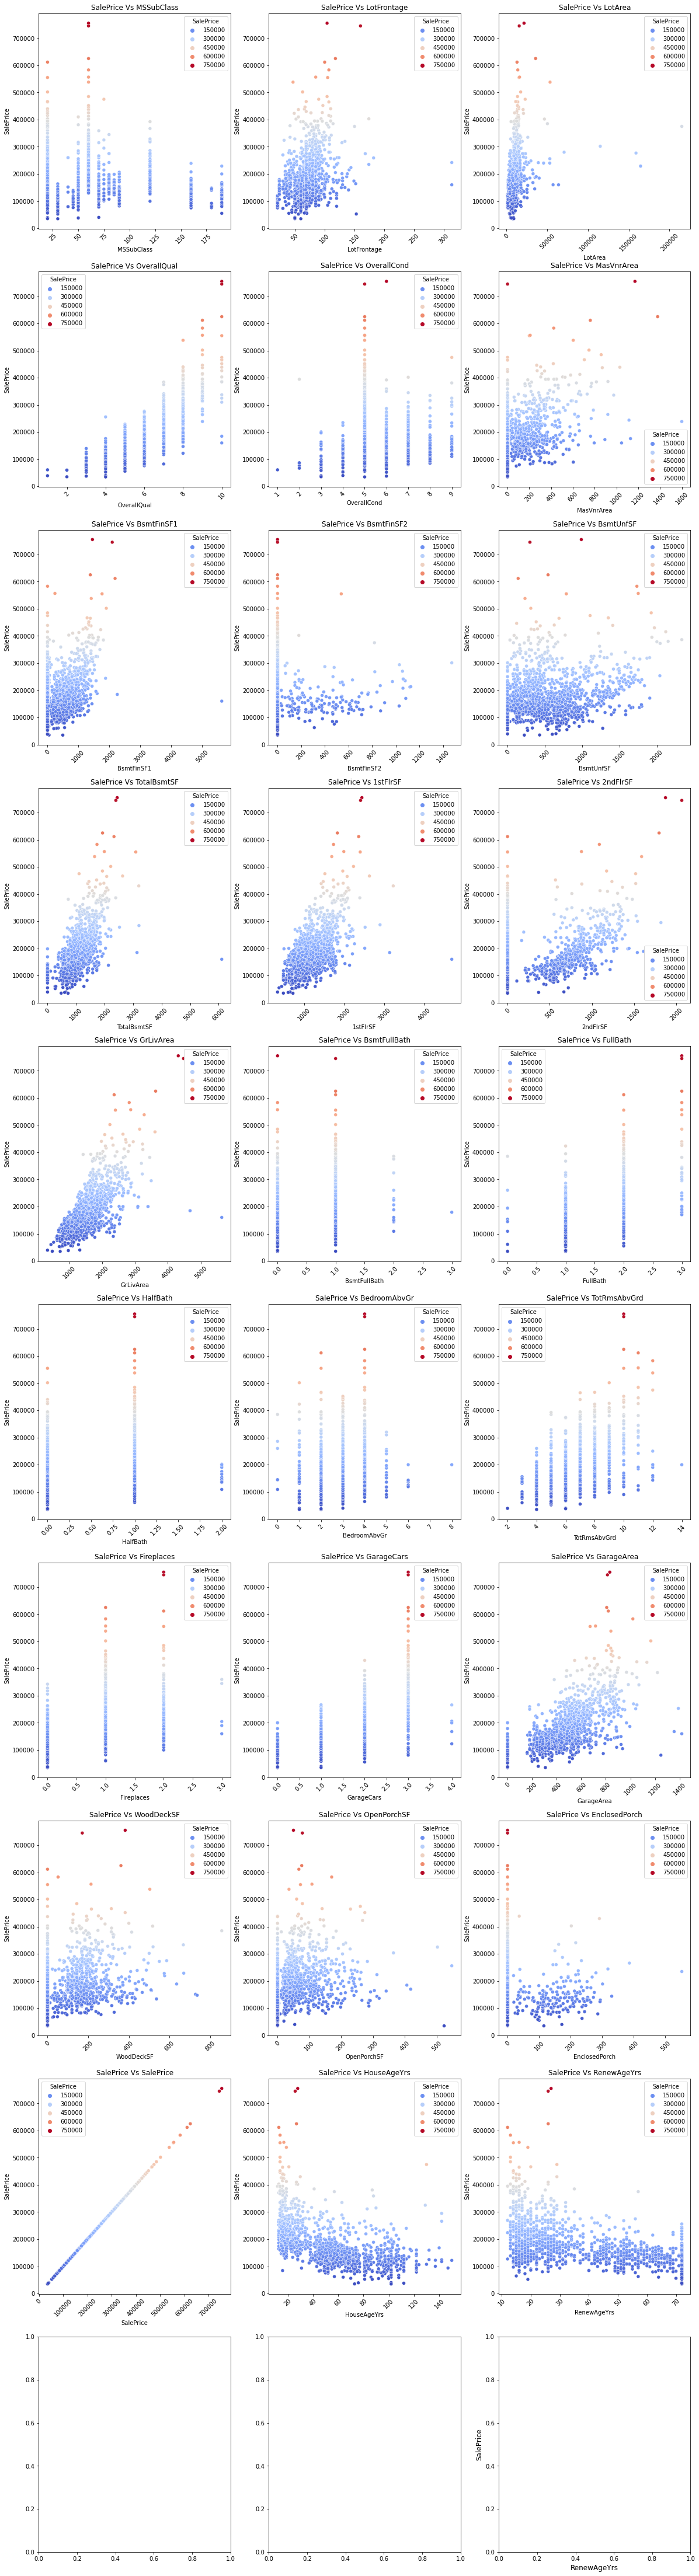

In [24]:
#Univariate Analysis
num_housing_df = housing_df.select_dtypes(include=['int64','float64'])
fig,ax = plt.subplots(10,3,figsize=(20,80))
for i,ax in zip(num_housing_df.columns,ax.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_housing_df,ax=ax,palette='coolwarm')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('SalePrice'+' Vs '+str(i))

#### Outliers - Quantile based flooring and capping  

In [25]:
def QuantileCap(input, lowCap, highCap):
    low_percentile = np.percentile(input, lowCap)
    high_percentile = np.percentile(input, highCap)
    input = np.where(input > high_percentile, high_percentile, input)
    out = (np.where(input < low_percentile, low_percentile, input))
    return out

In [26]:
for i in num_housing_df.columns:
    num_housing_df[i] = QuantileCap(num_housing_df[i], 10, 90)

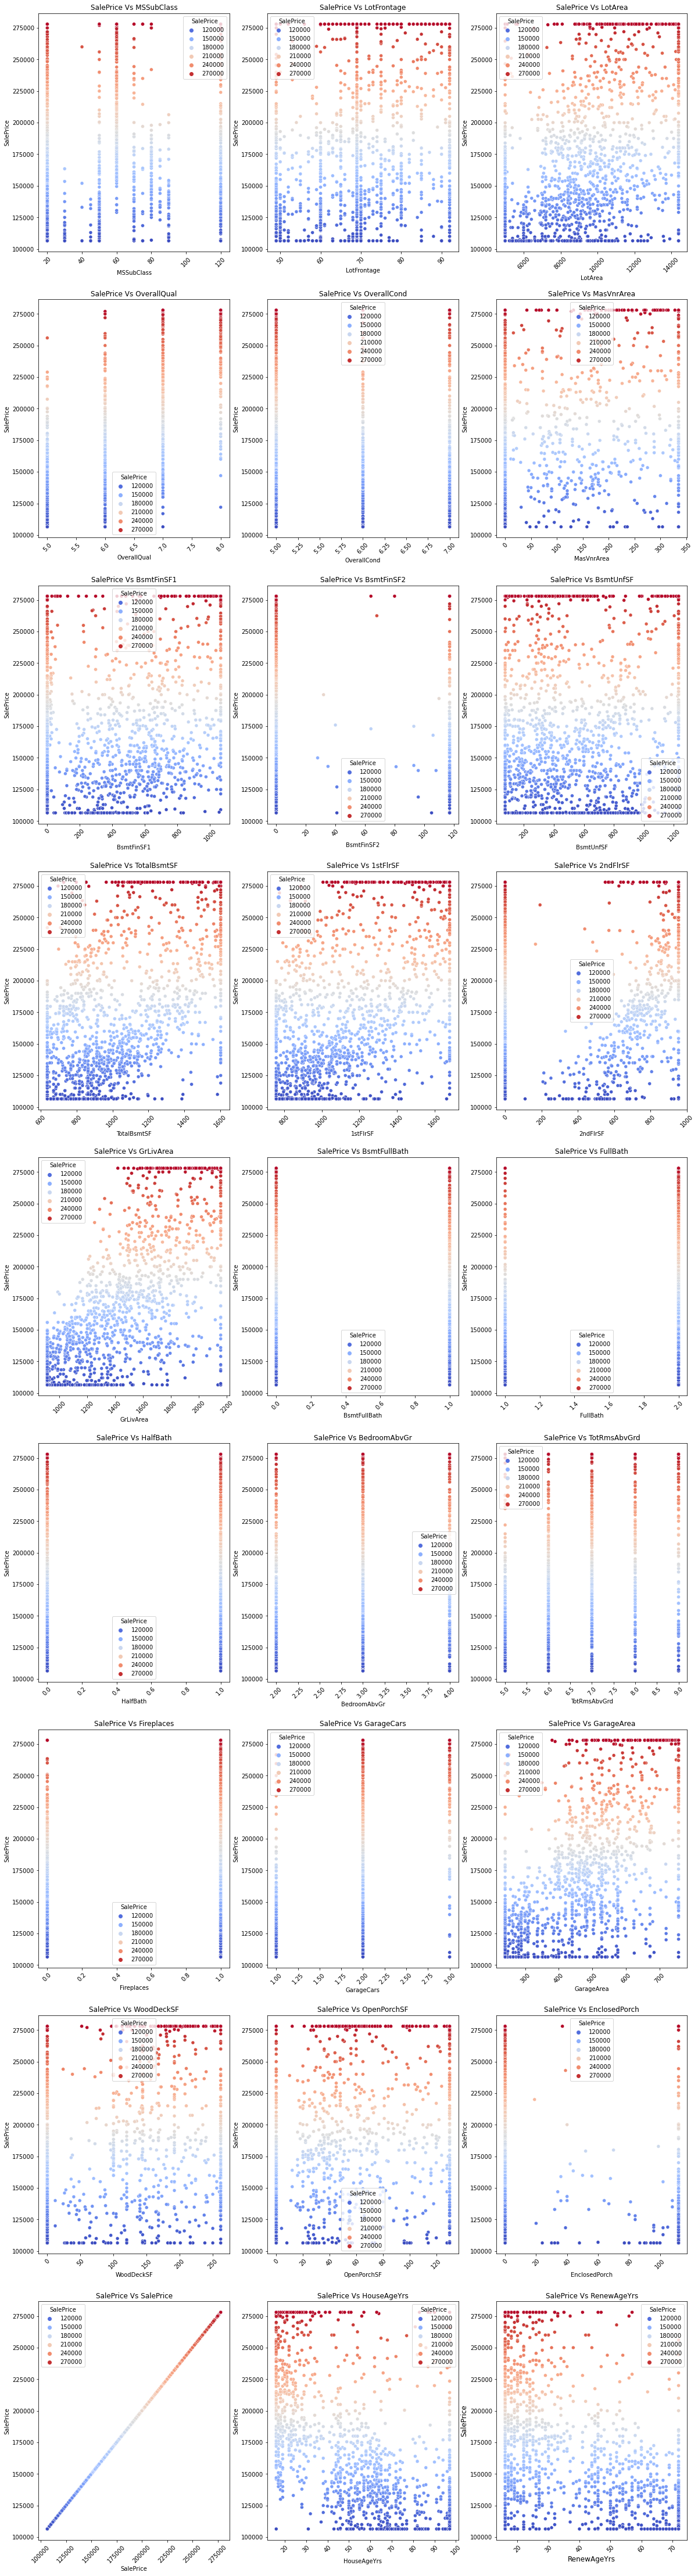

In [27]:
fig,ax = plt.subplots(9,3,figsize=(20,80))
for i,ax in zip(num_housing_df.columns,ax.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=num_housing_df,ax=ax,palette='coolwarm')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title('SalePrice'+' Vs '+str(i))

In [28]:
housing_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [29]:
#Inferences as how variables impacting SalePrice individually 
# MSSubClass: more cases as well as more than average sale price for new/finshed 1 & 2 story 
# LotFrontage: slight price increase with increase in LotFrontage 
# LotArea: most cases around 10000 LotArea
# OverQual: ascending triangle relation with price
# OverallCond: max price for average overall condition
# BsmtFinSF1, TotalBsmtSF - positive linear pattern between basement type1/total area and sale price
# 1stFlrSF, 2ndFlrSF, GrLivArea - Positive linear relation with Sale price 
# HouseAgeYrs:for house age > 10 yrs, negative linear relationship with sale price 

In [30]:
housing_df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
cat_columns = housing_df.select_dtypes(include=['object']).columns


In [32]:
housing_df.select_dtypes(include=['object']).columns.size

29

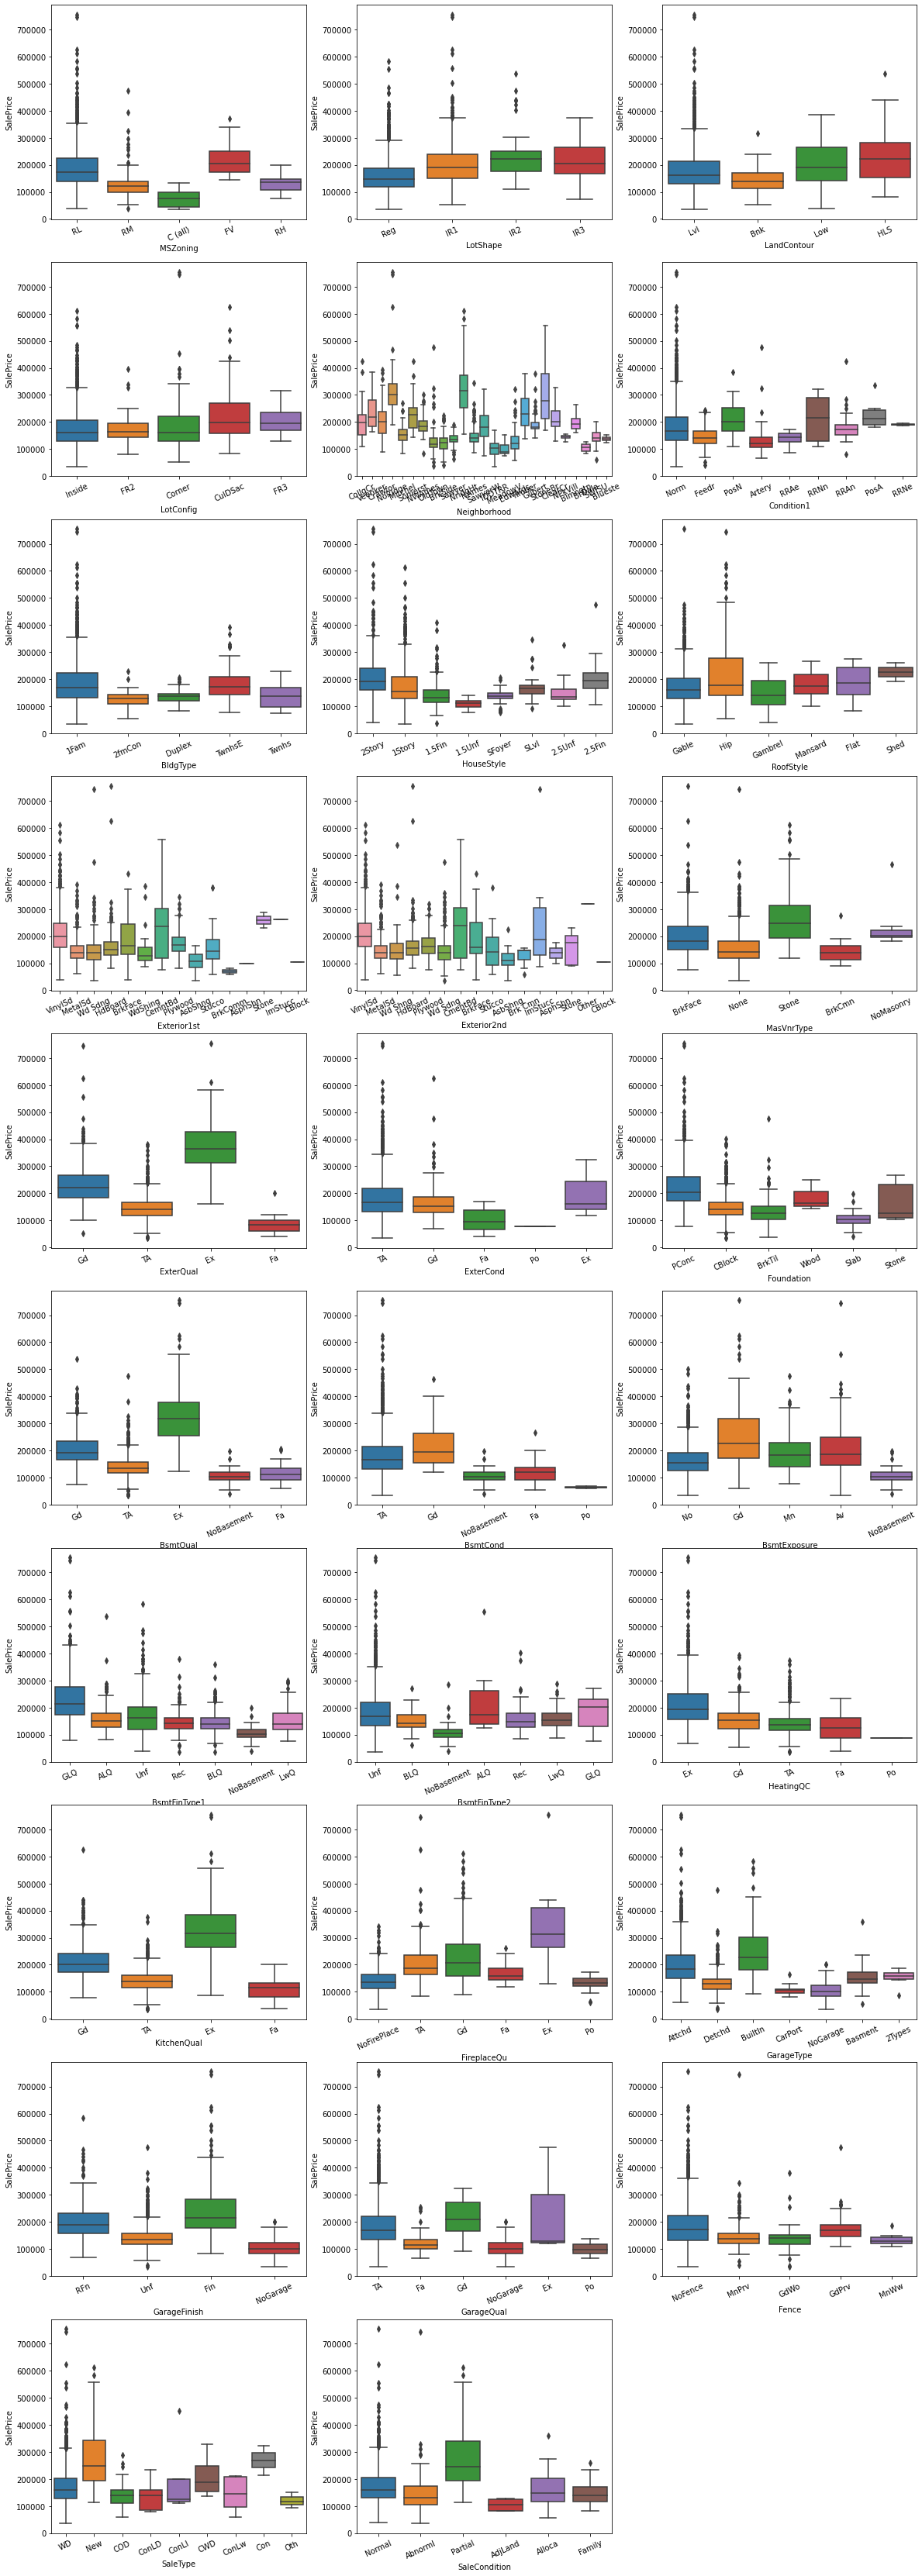

In [33]:
# visualizing dataset - categorical varibles 
plt.figure(figsize=(20,60))

row_num = 1
for i in cat_columns:
    plt.subplot(10,3,row_num)
    row_num = row_num +1
    sns.boxplot(x= i, y='SalePrice', data= housing_df)
    plt.xticks(rotation = 25, size=10)
    plt.yticks(size=10)
plt.show()

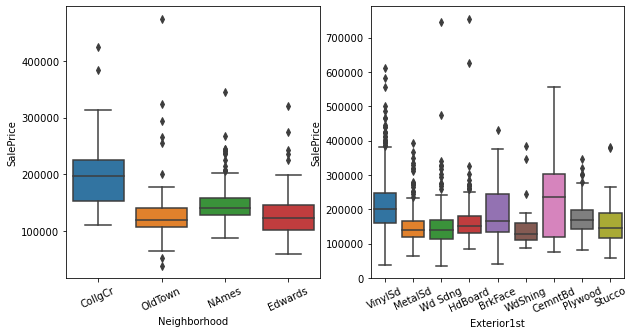

In [34]:
# visualizing dataset - categorical varibles with specific categories 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xticks(rotation = 25)
sns.boxplot(x= 'Neighborhood', y='SalePrice', data=housing_df[housing_df['Neighborhood'].isin(['NAmes', 'CollgCr','OldTown','Edwards'])])
plt.subplot(1,2,2)
plt.xticks(rotation = 25)
sns.boxplot(x='Exterior1st', y='SalePrice', data=housing_df[housing_df['Exterior1st'].isin(['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng','Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'Stucco'])])
plt.show()

In [35]:
# MSZoning: lowest prices for commercial zone, best prices for village zone and lowest for commerical zone. High price outliers in low density zone and then medium density zone 
#LotShape: lowest and highest prices in regular shape. Highest value for slightly irregular shape.
#LandContour: high price outliers in flat level whereas lowest interquantile range in case of Banked 
#Neighborhood: best prices for college creek
#Condition1: high prices for close to North-South railroad, adjacent to positive off-site feature and near park and greenbelt
#HouseStyle: high/good prices for 2.5 story-finished, 2 story and 1 story
#RoofStyle: high price in shed, Gabel and hip style roof
#Exterior1st: good price for cement bold, brick face and vinyl siding    

In [36]:
# high price for excellent quality of heating/kitchen/fireplace/Garage
#as well as high price when built-in garage, fine garage finish, new sale type and and under construction(partial constructed) 

In [37]:
#Exterior2nd: good price for cement bold, brick face and vinyl siding 
# MasVnrType, EterQual, ExterCond: high price for stone based Masonry, excellent quality & condition of material of exterior  

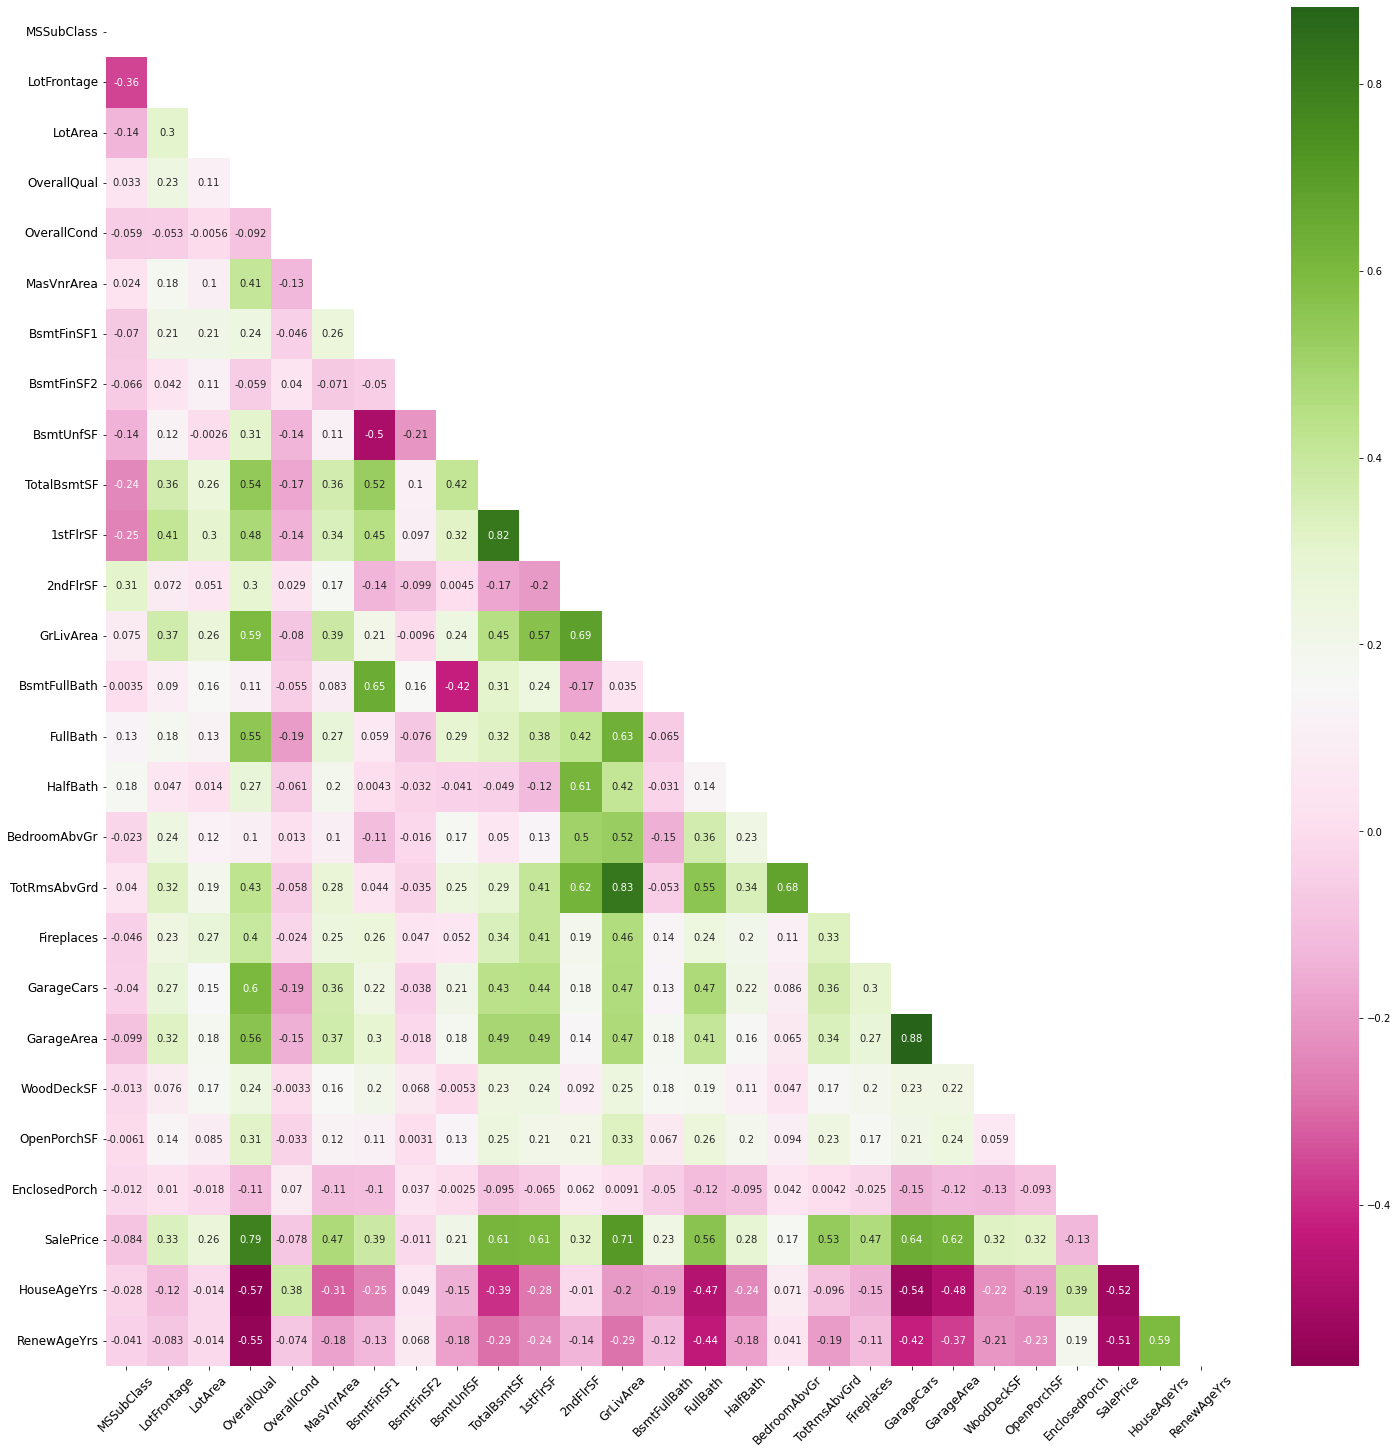

In [38]:
# let's observe correlation between the variables 
plt.figure(figsize = (25,25))
matrix = np.triu(housing_df.corr())
sns.heatmap(housing_df.corr(), annot = True, cmap="PiYG", mask=matrix)
plt.xticks(size=12, rotation=45)
plt.yticks(size=12)
plt.show()

In [39]:
# Sale price is having high positive correlation with overall quality, overall condition,masonry veneer area, 
# basement unfinished square feet, total basement square feet, 2nd floor sqaure feet, basement full bathrooms, 
# bedroom above ground, total rooms above ground, fire places and garage car size   
# sale price is having negative correlation with house age and renewal age 

### 3. Preparing Data for Modelling (train-test-split, rescaling etc)


In [40]:
# continuous variable list
Con_Var = list(housing_df.select_dtypes(["int64","float64"]).columns)

In [41]:
# categorical variable list
Cat_Var = list(housing_df.select_dtypes("object").columns)

In [42]:
# create dummy variables for categorical variables

Cat_Var_df = pd.get_dummies(data=housing_df[Cat_Var], drop_first=True)
Con_Var_df = housing_df[Con_Var]
Model_df = pd.concat([Cat_Var_df, Con_Var_df], axis=1)

In [43]:
Model_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  ...  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
0                1  ...             8           0           2         548   
1                1  ...             6           1           2         460   
2                1  ...             6           1           2         608   
3                1  ...             7           1           3         642   
4                1  ...             9           1           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  SalePrice  HouseAgeYrs  RenewAgeYrs  
0           0           61              0     208500           19           19  
1         298            0              0     181500           46           46  
2           0           42              0     223500           21           20  
3           0           35            272     140000          107           52  
4         192           84              0     250000           22           22  

[5 rows x 201 columns]

In [44]:
Model_df.describe()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean      0.044521     0.010959     0.788356     0.149315      0.028082   
std       0.206319     0.104145     0.408614     0.356521      0.165264   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     1.000000     0.000000      0.000000   
50%       0.000000     0.000000     1.000000     0.000000      0.000000   
75%       0.000000     0.000000     1.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
count   1460.000000   1460.000000      1460.000000      1460.000000   
mean       0.006849      0.633562         0.034247         0.024658   
std        0.082505      0.481996         0.181924         0.155132   
min        0.000000      0.000000         0.000000         0.000000   
25%        0.000000      0.000000         0.000000         0.000000   
50%        0.000000      1.000000         0.000000         0.000000   
75%        0.000000      1.000000         0.000000         0.000000   
max        1.000000      1.000000         1.000000         1.000000   

       LandContour_Lvl  ...  TotRmsAbvGrd   Fireplaces   GarageCars  \
count      1460.000000  ...   1460.000000  1460.000000  1460.000000   
mean          0.897945  ...      6.517808     0.613014     1.767123   
std           0.302824  ...      1.625393     0.644666     0.747315   
min           0.000000  ...      2.000000     0.000000     0.000000   
25%           1.000000  ...      5.000000     0.000000     1.000000   
50%           1.000000  ...      6.000000     1.000000     2.000000   
75%           1.000000  ...      7.000000     1.000000     2.000000   
max           1.000000  ...     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch      SalePrice  \
count  1460.000000  1460.000000  1460.000000    1460.000000    1460.000000   
mean    472.980137    94.244521    46.660274      21.954110  180921.195890   
std     213.804841   125.338794    66.256028      61.119149   79442.502883   
min       0.000000     0.000000     0.000000       0.000000   34900.000000   
25%     334.500000     0.000000     0.000000       0.000000  129975.000000   
50%     480.000000     0.000000    25.000000       0.000000  163000.000000   
75%     576.000000   168.000000    68.000000       0.000000  214000.000000   
max    1418.000000   857.000000   547.000000     552.000000  755000.000000   

       HouseAgeYrs  RenewAgeYrs  
count  1460.000000  1460.000000  
mean     50.732192    37.134247  
std      30.202904    20.645407  
min      12.000000    12.000000  
25%      22.000000    18.000000  
50%      49.000000    28.000000  
75%      68.000000    55.000000  
max     150.000000    72.000000  

[8 rows x 201 columns]

In [45]:
Model_df.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice', 'HouseAgeYrs',
       'RenewAgeYrs'],
      dtype='object', length=201)

In [46]:
Model_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [47]:
# Model_df[Model_df['SalePrice'] > 13.247694]
Model_df['SalePrice'].mean()

180921.19589041095

<AxesSubplot:xlabel='SalePrice'>

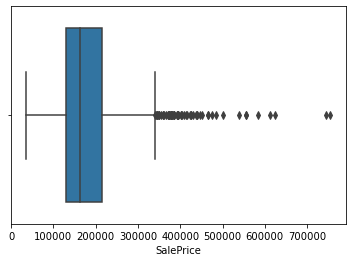

In [48]:
sns.boxplot(x=Model_df['SalePrice'])

In [49]:
# Conclusion: Target variable range is quite ok.
# outliers are not required to be treated as we do not want to miss special cases where price low and above the IQR range 

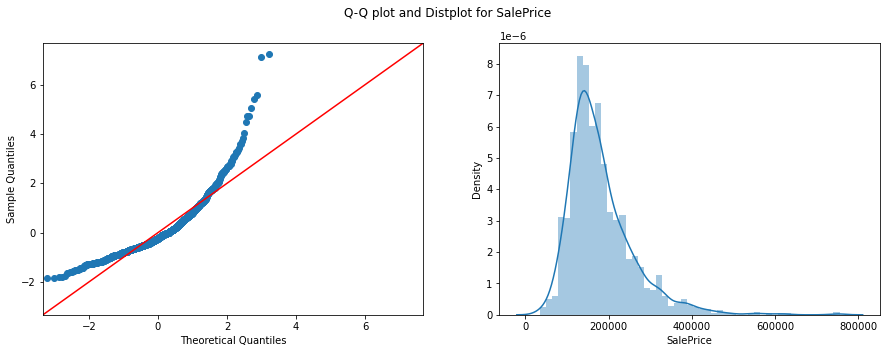

In [50]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Q-Q plot and Distplot for SalePrice")
sm.qqplot(data=Model_df["SalePrice"], fit=True, line="45", ax=ax[0])
sns.distplot(Model_df["SalePrice"], ax=ax[1])
plt.show()

#### Conclusion: 
We can see here Target Variable ("SalePrice") is not normalized and skewed right

#### Target Variable Transformation 

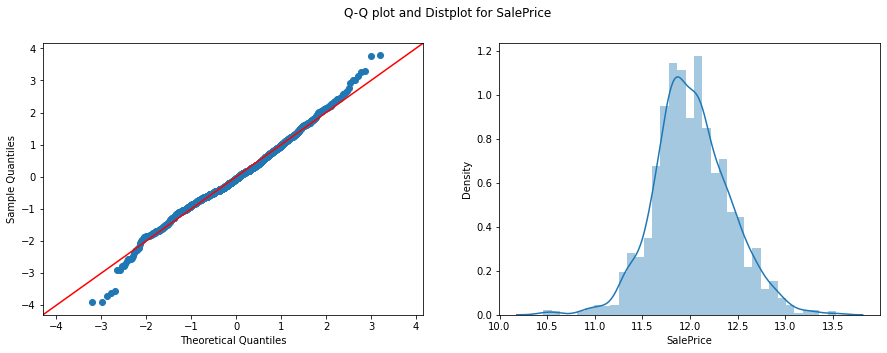

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Q-Q plot and Distplot for SalePrice")
sm.qqplot(data=np.log(Model_df["SalePrice"]), fit=True, line="45", ax=ax[0])
sns.distplot(np.log(Model_df["SalePrice"]), ax=ax[1])
plt.show()

#### Conclusion: Target is normalized usign log transformation

In [52]:
Model_df["SalePrice"] = np.log(Model_df["SalePrice"])

In [53]:
#Train-Test Spitting 
np.random.seed(0) # start random variable at same point always
train_df, test_df = train_test_split(Model_df, train_size=0.7, random_state=100)

print (train_df.shape)
print (test_df.shape)

(1021, 201)
(439, 201)


In [54]:
# rescaling on continusous variables 

scaler = MinMaxScaler()
train_df[Con_Var] = scaler.fit_transform(train_df[Con_Var])
train_df.describe()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
count  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   
mean      0.044074     0.012733     0.785504     0.150833      0.030362   
std       0.205361     0.112173     0.410673     0.358061      0.171666   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     1.000000     0.000000      0.000000   
50%       0.000000     0.000000     1.000000     0.000000      0.000000   
75%       0.000000     0.000000     1.000000     0.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
count   1021.000000   1021.000000      1021.000000      1021.000000   
mean       0.008815      0.633692         0.034280         0.028404   
std        0.093519      0.482031         0.182037         0.166204   
min        0.000000      0.000000         0.000000         0.000000   
25%        0.000000      0.000000         0.000000         0.000000   
50%        0.000000      1.000000         0.000000         0.000000   
75%        0.000000      1.000000         0.000000         0.000000   
max        1.000000      1.000000         1.000000         1.000000   

       LandContour_Lvl  ...  TotRmsAbvGrd   Fireplaces   GarageCars  \
count      1021.000000  ...   1021.000000  1021.000000  1021.000000   
mean          0.895201  ...      0.318582     0.199478     0.442948   
std           0.306445  ...      0.145956     0.215256     0.186530   
min           0.000000  ...      0.000000     0.000000     0.000000   
25%           1.000000  ...      0.181818     0.000000     0.250000   
50%           1.000000  ...      0.272727     0.333333     0.500000   
75%           1.000000  ...      0.363636     0.333333     0.500000   
max           1.000000  ...      1.000000     1.000000     1.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    SalePrice  \
count  1021.000000  1021.000000  1021.000000    1021.000000  1021.000000   
mean      0.332860     0.108100     0.089934       0.042105     0.508400   
std       0.149657     0.145250     0.126569       0.114434     0.129011   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.232722     0.000000     0.000000       0.000000     0.426511   
50%       0.338505     0.000000     0.049713       0.000000     0.497333   
75%       0.406206     0.196033     0.133843       0.000000     0.591417   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

       HouseAgeYrs  RenewAgeYrs  
count  1021.000000  1021.000000  
mean      0.280281     0.416928  
std       0.219718     0.343416  
min       0.000000     0.000000  
25%       0.072464     0.100000  
50%       0.268116     0.266667  
75%       0.405797     0.716667  
max       1.000000     1.000000  

[8 rows x 201 columns]

### 4. Model Building

In [55]:
# defining function which will calculate metrics and display values in the table for Train and Test to ease comparison 

def Cal_Metric(y_trn, y_trn_p, y_tst, y_tst_p):
    
    r2_metric = rss_metric = mse_metric = metric = metric_vals = []
    
    r2_metric = [round (r2_score(y_trn, y_trn_p), 2), round (r2_score(y_tst, y_tst_p),2)]
    rss_metric = [round(np.sum(np.square(y_trn - y_trn_p)),7), round(np.sum(np.square(y_tst - y_tst_p)),7)]
    mse_metric = [round (mean_squared_error(y_trn, y_trn_p),7), round(mean_squared_error(y_tst, y_tst_p),7)]
  
    metric = [['R2'] + r2_metric, ['RSS'] + rss_metric, ['MSE'] + mse_metric]
    # table
    print( tabulate(metric, headers=["Metric", "Train", "Test"], tablefmt="grid"))
    
    metric_vals.extend(r2_metric)
    metric_vals.extend(rss_metric)
    metric_vals.extend(mse_metric)
    
    return (metric_vals)                                                                
    

In [56]:
Metric_MLR = Metric_Reg = Metric_Las = []

#### 4.1 Multiple Linear Regresion

In [57]:
# spliting training data in X and y 

y_train = train_df.pop("SalePrice")
X_train = train_df

In [58]:
# Instantiating LR Model
lm = LinearRegression()

# Fitting a line
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# apply scaler on test data
test_df[Con_Var] = scaler.transform(test_df[Con_Var])

In [60]:
# spliting test data in X and y 
y_test = test_df.pop("SalePrice")
X_test = test_df

In [61]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
Metric_MLR = Cal_Metric(y_train, y_pred_train, y_test, y_pred_test)


+----------+-----------+--------------+
| Metric   |     Train |         Test |
+==========+===========+==============+
| R2       | 0.92      | -4.6196e+22  |
+----------+-----------+--------------+
| RSS      | 1.35102   |  3.53665e+23 |
+----------+-----------+--------------+
| MSE      | 0.0013232 |  8.05614e+20 |
+----------+-----------+--------------+


In [62]:
# Conclusion: the model is overfitted. We will solve this by leveraging advanced regression techniques - Ridge & Lasso

#### 4.2 Ridge Regression

In [63]:
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
           4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]} 
folds = 5

In [64]:
ridgeModel1 = Ridge()
#cross validation
model_cv_rig1 = GridSearchCV(estimator = ridgeModel1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_rig1.fit(X_train, y_train)
# printing the best hyperparameter alpha
model_cv_rig1.best_params_['alpha']

Fitting 5 folds for each of 29 candidates, totalling 145 fits


2.0

In [65]:
# lets now build Ridge Model using alpha = 2.0
ridgeModel1 = Ridge(alpha = 2.0)
ridgeModel1.fit(X_train, y_train)
y_pred_train_rig1 = ridgeModel1.predict(X_train)
y_pred_test_rig1 = ridgeModel1.predict(X_test)
Metric_Rig1 = Cal_Metric(y_train, y_pred_train_rig1, y_test, y_pred_test_rig1)

+----------+-----------+-----------+
| Metric   |     Train |      Test |
+==========+===========+===========+
| R2       | 0.92      | 0.88      |
+----------+-----------+-----------+
| RSS      | 1.35714   | 0.925929  |
+----------+-----------+-----------+
| MSE      | 0.0013292 | 0.0021092 |
+----------+-----------+-----------+


In [66]:
cv_results_rig1 = pd.DataFrame(model_cv_rig1.cv_results_)
# cv_results_rig

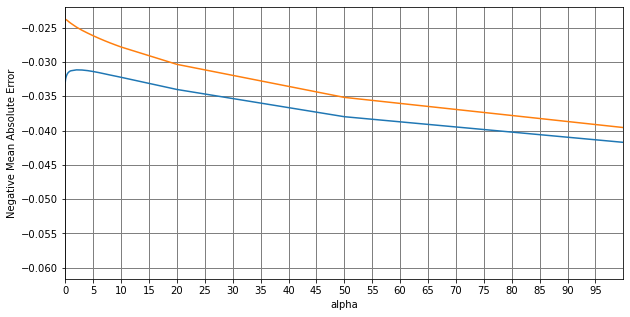

In [67]:
# Plotting the mean test and train scores
plt.figure(figsize=(10, 5))
plt.plot(cv_results_rig1['param_alpha'], cv_results_rig1['mean_test_score'])
plt.plot(cv_results_rig1['param_alpha'], cv_results_rig1['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)   # not using actual range of 
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='Grey', linestyle='-', linewidth=1)
plt.show()

#### Conclusion: 
R2 value is good for both Train and Test and not much difference. Overfitting problem is resolved with Ridge Regression 

#### Now using douple the above alpha 

In [68]:
# Let's use alpha double the earlier value as requested in the assignment 
ridgeModel2 = Ridge(alpha = 4.0)
ridgeModel2.fit(X_train, y_train)
y_pred_train_rig2 = ridgeModel2.predict(X_train)
y_pred_test_rig2 = ridgeModel2.predict(X_test)
Metric_Rig2 = Cal_Metric(y_train, y_pred_train_rig2, y_test, y_pred_test_rig2)

+----------+-----------+-----------+
| Metric   |     Train |      Test |
+==========+===========+===========+
| R2       | 0.92      | 0.88      |
+----------+-----------+-----------+
| RSS      | 1.43676   | 0.935103  |
+----------+-----------+-----------+
| MSE      | 0.0014072 | 0.0021301 |
+----------+-----------+-----------+


In [69]:
#Conclusion: After using double the optimial alpha value, R2 score descresed and RSS score increased; 
# better to stick with the optimal alpha value = 0.2

#### 4.3 Lasso Regression

In [70]:
lassoModel1 = Lasso()

# cross validation
model_cv_las1 = GridSearchCV(estimator = lassoModel1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_las1.fit(X_train, y_train)
model_cv_las1.best_params_["alpha"]

Fitting 5 folds for each of 29 candidates, totalling 145 fits


0.0001

In [71]:
cv_results_las1 = pd.DataFrame(model_cv_las1.cv_results_)
# cv_results_las    

In [72]:
cv_results_las1.mean_train_score.max(), cv_results_las1.mean_train_score.min(), cv_results_las1.mean_train_score.mean()


(-0.023825260299911572, -0.10086019457410864, -0.09193265544241522)

In [73]:
cv_results_las1.mean_test_score.max(), cv_results_las1.mean_test_score.min(), cv_results_las1.mean_test_score.mean()

(-0.030004945773406656, -0.10103592757151594, -0.09260598955900289)

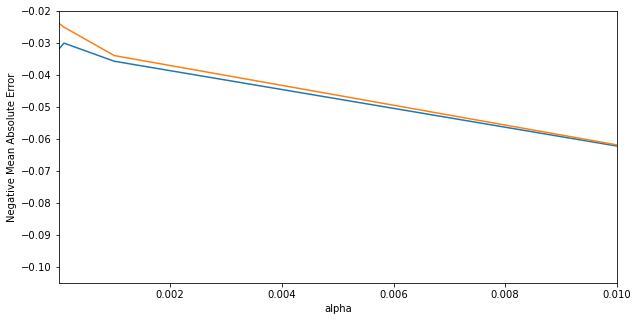

In [74]:
# Plotting the mean test and train scores
plt.figure(figsize=(10, 5))
plt.plot(cv_results_las1['param_alpha'], cv_results_las1['mean_test_score'])
plt.plot(cv_results_las1['param_alpha'], cv_results_las1['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0.00001, 0.01) # not plotting all alpha values as it will show straight line for alpha > 0.0001
plt.show()

In [75]:
# lets use the best identified alpha value = 0.0001

lassoModel1 = Lasso(alpha=0.0001)
        
lassoModel1.fit(X_train, y_train)

y_pred_train_las1 = lassoModel1.predict(X_train)
y_pred_test_las1 = lassoModel1.predict(X_test)

Metric_Las1 = Cal_Metric(y_train, y_pred_train_las1, y_test, y_pred_test_las1)

+----------+-----------+-----------+
| Metric   |     Train |      Test |
+==========+===========+===========+
| R2       | 0.92      | 0.89      |
+----------+-----------+-----------+
| RSS      | 1.41686   | 0.876722  |
+----------+-----------+-----------+
| MSE      | 0.0013877 | 0.0019971 |
+----------+-----------+-----------+


### 5. Model Tuning

#### double the alpha

In [76]:
# lets use alpha value = 0.0002

lassoModel2 = Lasso(alpha=0.0002)
        
lassoModel2.fit(X_train, y_train)

y_pred_train_las2 = lassoModel2.predict(X_train)
y_pred_test_las2 = lassoModel2.predict(X_test)

Metric_Las2 = Cal_Metric(y_train, y_pred_train_las2, y_test, y_pred_test_las2)

+----------+-----------+-----------+
| Metric   |     Train |      Test |
+==========+===========+===========+
| R2       | 0.91      | 0.88      |
+----------+-----------+-----------+
| RSS      | 1.58449   | 0.890596  |
+----------+-----------+-----------+
| MSE      | 0.0015519 | 0.0020287 |
+----------+-----------+-----------+


### 6. Model Evaluation & Inferences

#### Conclusion: 
 - Linear Regresion Model with overfitting problem which is getting solved with Ridge and Lasso 
 - Both Ridge and Lasso with descent metric but Lasso Model is with best scores 


In [77]:
# Coefficients view post regularization 

betas = pd.DataFrame(index=train_df.columns)
betas.rows = train_df.columns
betas['Linear_Model'] = lm.coef_
betas['Ridge_Model_1'] = ridgeModel1.coef_
betas['Ridge_Model_2'] = ridgeModel2.coef_
betas['Lasso_Model_1'] = lassoModel1.coef_
betas['Lasso_Model_2'] = lassoModel2.coef_

In [78]:
pd.set_option('display.max_rows', None)
betas.head(20)

Linear_Model  Ridge_Model_1  Ridge_Model_2  \
MSZoning_FV               0.139764       0.047979       0.031391   
MSZoning_RH               0.132937       0.050049       0.031766   
MSZoning_RL               0.143884       0.055041       0.038596   
MSZoning_RM               0.131583       0.047212       0.028165   
LotShape_IR2              0.011214       0.011458       0.010671   
LotShape_IR3             -0.020010      -0.020141      -0.017785   
LotShape_Reg              0.003623       0.002046       0.001294   
LandContour_HLS           0.017580       0.021640       0.017615   
LandContour_Low           0.032750       0.031661       0.026862   
LandContour_Lvl           0.023076       0.022831       0.018840   
LotConfig_CulDSac         0.011202       0.012089       0.012779   
LotConfig_FR2            -0.019845      -0.019720      -0.018146   
LotConfig_FR3            -0.023771      -0.009663      -0.005913   
LotConfig_Inside         -0.002618      -0.003373      -0.003424   
Neighborhood_Blueste     -0.009680      -0.007660      -0.004283   
Neighborhood_BrDale      -0.030247      -0.023679      -0.018254   
Neighborhood_BrkSide      0.027763      -0.001194      -0.001348   
Neighborhood_ClearCr      0.040317       0.025472       0.021843   
Neighborhood_CollgCr      0.010119      -0.000955      -0.003809   
Neighborhood_Crawfor      0.066900       0.053215       0.048753   

                      Lasso_Model_1  Lasso_Model_2  
MSZoning_FV                0.048881       0.005681  
MSZoning_RH                0.050980       0.004959  
MSZoning_RL                0.057047       0.018773  
MSZoning_RM                0.042047       0.000000  
LotShape_IR2               0.008824       0.007060  
LotShape_IR3              -0.018724      -0.001886  
LotShape_Reg               0.000880      -0.000000  
LandContour_HLS            0.017091       0.006347  
LandContour_Low            0.027954       0.018174  
LandContour_Lvl            0.020330       0.011182  
LotConfig_CulDSac          0.011932       0.012859  
LotConfig_FR2             -0.012260      -0.005432  
LotConfig_FR3             -0.000000      -0.000000  
LotConfig_Inside          -0.001559      -0.000625  
Neighborhood_Blueste      -0.000000      -0.000000  
Neighborhood_BrDale       -0.003406      -0.000000  
Neighborhood_BrkSide       0.000552       0.000000  
Neighborhood_ClearCr       0.026899       0.024556  
Neighborhood_CollgCr       0.000000       0.000000  
Neighborhood_Crawfor       0.051310       0.044724

In [79]:
# finding out number of features used in advanced regression 

MLR_Predictors = round (len (list(betas[betas['Linear_Model'] != 0.0].index)), 2)
Rig_Model1_Predictors = round (len (list(betas[betas["Ridge_Model_1"] != 0.0].index)), 2)
Rig_Model2_Predictors = round (len (list(betas[betas["Ridge_Model_2"] != 0.0].index)), 2)
Las_Model1_Predictors = round (len (list(betas[betas["Lasso_Model_1"] != 0.0].index)), 2)
Las_Model2_Predictors = round (len (list(betas[betas["Lasso_Model_2"] != 0.0].index)), 2)



In [80]:
# comparing metrics across models 

Metric_Table = {'Metric': ['Predictor Count','R2 (Train)', 'R2 (Test)', 'RSS (Train)', 'RSS (Test)', 'MSE (Train)', 'MSE (Test)'], 'Linear Regression': [MLR_Predictors] +  Metric_MLR}

LR_df = pd.DataFrame(Metric_Table, columns=['Metric', 'Linear Regression'])
Rig1_series = pd.Series([Rig_Model1_Predictors] + Metric_Rig1, name = "Ridge Regression Model-1")
Rig2_series = pd.Series([Rig_Model2_Predictors] + Metric_Rig2, name = "Ridge Regression Model-2")
Las1_series = pd.Series([Las_Model1_Predictors] + Metric_Las1, name = "Lasso Regression Model-1")
Las2_series = pd.Series([Las_Model2_Predictors] + Metric_Las2, name = "Lasso Regression Model-2")
FinalMetric = pd.concat([LR_df, Rig1_series, Rig2_series, Las1_series, Las2_series], axis = 1)
FinalMetric

Metric  Linear Regression  Ridge Regression Model-1  \
0  Predictor Count       2.000000e+02                198.000000   
1       R2 (Train)       9.200000e-01                  0.920000   
2        R2 (Test)      -4.619597e+22                  0.880000   
3      RSS (Train)       1.351018e+00                  1.357138   
4       RSS (Test)       3.536647e+23                  0.925929   
5      MSE (Train)       1.323200e-03                  0.001329   
6       MSE (Test)       8.056144e+20                  0.002109   

   Ridge Regression Model-2  Lasso Regression Model-1  \
0                198.000000                124.000000   
1                  0.920000                  0.920000   
2                  0.880000                  0.890000   
3                  1.436759                  1.416859   
4                  0.935103                  0.876722   
5                  0.001407                  0.001388   
6                  0.002130                  0.001997   

   Lasso Regression Model-2  
0                 94.000000  
1                  0.910000  
2                  0.880000  
3                  1.584495  
4                  0.890596  
5                  0.001552  
6                  0.002029

#### Conclusion
- Lasso is simple as covering lower number of predictors compare to Ridge 
- Lasso Model 2 is simplest as with lowest number of predictors 

In [81]:
# Top 5 features (positive coefficients) in Ridge Regression Model 1:

betas["Ridge_Model_1"].sort_values(ascending=False)[:5]

OverallQual    0.127016
GrLivArea      0.096383
1stFlrSF       0.084711
OverallCond    0.079508
2ndFlrSF       0.063604
Name: Ridge_Model_1, dtype: float64

In [82]:
# Top 5 features (negative coefficients) in Ridge Regression Model 1:

betas["Ridge_Model_1"].sort_values(ascending=True)[:5]

Neighborhood_MeadowV   -0.044557
Neighborhood_IDOTRR    -0.034331
Neighborhood_Edwards   -0.030641
MSSubClass             -0.027374
FireplaceQu_Po         -0.026362
Name: Ridge_Model_1, dtype: float64

In [83]:
# Top 5 features (positive coefficients) in Ridge Regression Model 2:

betas["Ridge_Model_2"].sort_values(ascending=False)[:5]

OverallQual    0.113251
GrLivArea      0.079792
OverallCond    0.070111
1stFlrSF       0.068035
2ndFlrSF       0.057339
Name: Ridge_Model_2, dtype: float64

In [84]:
# Top 5 features (negative coefficients) in Ridge Regression Model 2:

betas["Ridge_Model_2"].sort_values(ascending=True)[:5]

Neighborhood_MeadowV   -0.036769
Neighborhood_IDOTRR    -0.035948
Neighborhood_Edwards   -0.031038
RenewAgeYrs            -0.027607
MSSubClass             -0.025921
Name: Ridge_Model_2, dtype: float64

In [85]:
# Top 5 features (positive coefficients) in Lasso Regression Model 1:

betas["Lasso_Model_1"].sort_values(ascending=False)[:5]

GrLivArea      0.310363
OverallQual    0.161230
OverallCond    0.094591
GarageCars     0.078786
MSZoning_RL    0.057047
Name: Lasso_Model_1, dtype: float64

In [86]:
# Top 5 features (negative coefficients) in Lasso Regression Model 1:

betas["Lasso_Model_1"].sort_values(ascending=True)[:5]

MSSubClass             -0.036182
HouseAgeYrs            -0.032916
Neighborhood_Edwards   -0.027607
Neighborhood_IDOTRR    -0.023957
Neighborhood_MeadowV   -0.022728
Name: Lasso_Model_1, dtype: float64

In [87]:
# Top 5 features (positive coefficients) in Lasso Regression Model 2:

betas["Lasso_Model_2"].sort_values(ascending=False)[:5]

GrLivArea       0.304673
OverallQual     0.179266
OverallCond     0.091013
GarageCars      0.079679
BsmtFullBath    0.051339
Name: Lasso_Model_2, dtype: float64

In [88]:
# Top 5 features (negative coefficients) in Lasso Regression Model 2:

betas["Lasso_Model_2"].sort_values(ascending=True)[:5]

MSSubClass                -0.032386
HouseAgeYrs               -0.030130
Neighborhood_IDOTRR       -0.027772
Neighborhood_Edwards      -0.025632
BsmtExposure_NoBasement   -0.024206
Name: Lasso_Model_2, dtype: float64

#### Question-1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer: Optimal value for alpha for Ridge and Lasso regression is '2.0' & '0.0001' respectively 


#### Question-2:
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?



In [89]:
FinalMetric

Metric  Linear Regression  Ridge Regression Model-1  \
0  Predictor Count       2.000000e+02                198.000000   
1       R2 (Train)       9.200000e-01                  0.920000   
2        R2 (Test)      -4.619597e+22                  0.880000   
3      RSS (Train)       1.351018e+00                  1.357138   
4       RSS (Test)       3.536647e+23                  0.925929   
5      MSE (Train)       1.323200e-03                  0.001329   
6       MSE (Test)       8.056144e+20                  0.002109   

   Ridge Regression Model-2  Lasso Regression Model-1  \
0                198.000000                124.000000   
1                  0.920000                  0.920000   
2                  0.880000                  0.890000   
3                  1.436759                  1.416859   
4                  0.935103                  0.876722   
5                  0.001407                  0.001388   
6                  0.002130                  0.001997   

   Lasso Regression Model-2  
0                 94.000000  
1                  0.910000  
2                  0.880000  
3                  1.584495  
4                  0.890596  
5                  0.001552  
6                  0.002029

#### Answer: 
Considering below facts, I will consider Lasso regression as it is simpler than Ridge  
1) Simplicity: Lasso Model2 is with 94 predictors whereas Ridge Regression is with 198 and Lasso Model 1 is with 124 predictors. Lasso is simpler than Ridge here. And Lasso Model 2 is best

2) Metrics: R2/RSS/MSE scores are descent for both the models; Lasso Model1 is with best metrics 

#### Question-3:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [90]:
# Top 5 features (positive coefficients) in Lasso Regression Model:

betas["Lasso_Model_1"].sort_values(ascending=False)[:5]

GrLivArea      0.310363
OverallQual    0.161230
OverallCond    0.094591
GarageCars     0.078786
MSZoning_RL    0.057047
Name: Lasso_Model_1, dtype: float64

In [91]:
# Top 5 features (negative coefficients) in Lasso Regression Model:

betas["Lasso_Model_1"].sort_values(ascending=True)[:5]

MSSubClass             -0.036182
HouseAgeYrs            -0.032916
Neighborhood_Edwards   -0.027607
Neighborhood_IDOTRR    -0.023957
Neighborhood_MeadowV   -0.022728
Name: Lasso_Model_1, dtype: float64

In [92]:
# If we consider values without sign still positive top 5 coefficients are with most weightage  

In [93]:
X_train.columns.size

200

In [94]:
Top5Vars_Las = betas["Lasso_Model_1"].sort_values(ascending=False)[:5].index.values.tolist()
Top5Vars_Las

['GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'MSZoning_RL']

In [95]:
Top5Vars_Las = betas["Lasso_Model_2"].sort_values(ascending=False)[:5].index.values.tolist()
Top5Vars_Las

['GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'BsmtFullBath']

In [96]:
# dropping these 5 variables to build 3rd Lasso Model 

RevisedColumns = list (set(X_train.columns.to_list()) - set(Top5Vars_Las))
len(RevisedColumns)

195

In [97]:
lassoModel3 = Lasso(alpha=0.0002)

lassoModel3.fit(X_train[RevisedColumns], y_train)

y_pred_train_las3 = lassoModel3.predict(X_train[RevisedColumns])
y_pred_test_las3 = lassoModel3.predict(X_test[RevisedColumns])


Metric_Las3 = Cal_Metric(y_train, y_pred_train_las3, y_test, y_pred_test_las3)

+----------+-----------+-----------+
| Metric   |     Train |      Test |
+==========+===========+===========+
| R2       | 0.89      | 0.85      |
+----------+-----------+-----------+
| RSS      | 1.87122   | 1.12836   |
+----------+-----------+-----------+
| MSE      | 0.0018327 | 0.0025703 |
+----------+-----------+-----------+


In [98]:

betas = pd.DataFrame(index=RevisedColumns)
betas.rows = RevisedColumns
print ('Number of Variables in Lasso Model 3: ', len (RevisedColumns))
betas['Lasso_Model_3'] = lassoModel3.coef_

Las_Model3_Predictors = int (len (list(betas[lassoModel3.coef_ != 0.0].index)))
Las3_series = pd.Series([int (Las_Model3_Predictors)] + Metric_Las3, name = "Lasso Regression Model-3")


Number of Variables in Lasso Model 3:  195


In [99]:

FinalMetric = pd.concat([FinalMetric, Las3_series], axis = 1)
FinalMetric

Metric  Linear Regression  Ridge Regression Model-1  \
0  Predictor Count       2.000000e+02                198.000000   
1       R2 (Train)       9.200000e-01                  0.920000   
2        R2 (Test)      -4.619597e+22                  0.880000   
3      RSS (Train)       1.351018e+00                  1.357138   
4       RSS (Test)       3.536647e+23                  0.925929   
5      MSE (Train)       1.323200e-03                  0.001329   
6       MSE (Test)       8.056144e+20                  0.002109   

   Ridge Regression Model-2  Lasso Regression Model-1  \
0                198.000000                124.000000   
1                  0.920000                  0.920000   
2                  0.880000                  0.890000   
3                  1.436759                  1.416859   
4                  0.935103                  0.876722   
5                  0.001407                  0.001388   
6                  0.002130                  0.001997   

   Lasso Regression Model-2  Lasso Regression Model-3  
0                 94.000000                102.000000  
1                  0.910000                  0.890000  
2                  0.880000                  0.850000  
3                  1.584495                  1.871220  
4                  0.890596                  1.128363  
5                  0.001552                  0.001833  
6                  0.002029                  0.002570

In [100]:
# betas['Lasso_Model_3'] = lassoModel3.coef_
Las_Model3_Predictors = len (list(betas[lassoModel3.coef_ != 0.0].index))
Las3_series = pd.Series([Las_Model3_Predictors] + Metric_Las3, name = "Lasso Regression Model-3")


In [101]:
betas_las_3 = pd.Series(lassoModel3.coef_, index = RevisedColumns )

betas_las_3.sort_values(ascending=False)[:5]

1stFlrSF                0.265464
2ndFlrSF                0.132057
GarageArea              0.080834
TotRmsAbvGrd            0.058395
Neighborhood_Crawfor    0.049212
dtype: float64

In [102]:
betas_las_3.sort_values(ascending=True)[:5]

RenewAgeYrs            -0.046581
Neighborhood_IDOTRR    -0.043919
Neighborhood_Edwards   -0.037380
Neighborhood_MeadowV   -0.036936
KitchenQual_Fa         -0.033095
dtype: float64

#### Answer
Below are the five most important predictors along with their significace (coefficient value) after removing earlier top five predictors & rebuilding Lasso model
1) 1stFlrSF             (0.265459)
2) 2ndFlrSF             (0.132028)
3) GarageArea           (0.080873)
4) TotRmsAbvGrd         (0.058408)
5) Neighborhood_Crawfor (0.049208)

####                                   - End of Coding - 